In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg'

In [3]:
coords = pd.read_csv('New_Coord_DatasetCOCO_new.csv', index_col=False)

In [4]:
coords.head(1)

Nose_x  Nose_y  Neck_x  Neck_y  Right Shoulder_x  Right Shoulder_y  \
0  1228.0   882.0  1039.0  1386.0            1039.0            1386.0   

   Right Elbow_x  Right Elbow_y  Right Wrist_x  Right Wrist_y  ...  \
0         1323.0         1890.0         1795.0         1764.0  ...   

   Right Eye_x  Right Eye_y  Left Eye_x  Left Eye_y  Right Ear_x  Right Ear_y  \
0       1134.0        882.0      1228.0       882.0       1039.0        882.0   

   Left Ear_x  Left Ear_y  Label  Image_Name  
0         NaN         NaN      1     (1).jpg  

[1 rows x 38 columns]

In [5]:
pd.set_option('display.max_rows', None)
coords.head

<bound method NDFrame.head of       Nose_x  Nose_y  Neck_x  Neck_y  Right Shoulder_x  Right Shoulder_y  \
0     1228.0   882.0  1039.0  1386.0            1039.0            1386.0   
1      412.0   350.0   300.0   600.0             225.0             650.0   
2      750.0   350.0   862.0   600.0             825.0             550.0   
3      825.0   300.0   975.0   600.0             937.0             550.0   
4      937.0   500.0   937.0   750.0             862.0             700.0   
5      375.0   200.0   225.0   500.0             187.0             550.0   
6      637.0   350.0   412.0   450.0             337.0             500.0   
7      862.0   500.0   637.0   650.0             637.0             650.0   
8      300.0   500.0   525.0   600.0             487.0             600.0   
9      187.0   450.0   450.0   650.0             412.0             600.0   
10     487.0   350.0   637.0   650.0             675.0             650.0   
11     937.0   450.0   675.0   550.0             712.0    

In [6]:
coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nose_x            3066 non-null   float64
 1   Nose_y            3066 non-null   float64
 2   Neck_x            3123 non-null   float64
 3   Neck_y            3123 non-null   float64
 4   Right Shoulder_x  3117 non-null   float64
 5   Right Shoulder_y  3117 non-null   float64
 6   Right Elbow_x     2756 non-null   float64
 7   Right Elbow_y     2756 non-null   float64
 8   Right Wrist_x     2823 non-null   float64
 9   Right Wrist_y     2823 non-null   float64
 10  Left Shoulder_x   3116 non-null   float64
 11  Left Shoulder_y   3116 non-null   float64
 12  Left Elbow_x      2839 non-null   float64
 13  Left Elbow_y      2839 non-null   float64
 14  Left Wrist_x      2884 non-null   float64
 15  Left Wrist_y      2884 non-null   float64
 16  Right Hip_x       3034 non-null   float64


In [7]:
def change_label(a):
    if a['Label'] == 1:
        return 0
    elif a['Label'] == 2:
        return 1

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
len(['LAnkle_y', 'LAnkle_x', 'Right Ankle_y', 'Right Ankle_x', 'Right Ear_y', 'Right Ear_x', 'Right Eye_y', 'Right Eye_x',
            'Left Ear_x', 'Left Ear_y', 'Left Eye_x', 'Left Eye_y'])

12

In [10]:
coords.drop(['LAnkle_y', 'LAnkle_x', 'Right Ankle_y', 'Right Ankle_x', 'Right Ear_y', 'Right Ear_x', 'Right Eye_y', 'Right Eye_x',
            'Left Ear_x', 'Left Ear_y', 'Left Eye_x', 'Left Eye_y'], axis=1, inplace=True)
coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nose_x            3066 non-null   float64
 1   Nose_y            3066 non-null   float64
 2   Neck_x            3123 non-null   float64
 3   Neck_y            3123 non-null   float64
 4   Right Shoulder_x  3117 non-null   float64
 5   Right Shoulder_y  3117 non-null   float64
 6   Right Elbow_x     2756 non-null   float64
 7   Right Elbow_y     2756 non-null   float64
 8   Right Wrist_x     2823 non-null   float64
 9   Right Wrist_y     2823 non-null   float64
 10  Left Shoulder_x   3116 non-null   float64
 11  Left Shoulder_y   3116 non-null   float64
 12  Left Elbow_x      2839 non-null   float64
 13  Left Elbow_y      2839 non-null   float64
 14  Left Wrist_x      2884 non-null   float64
 15  Left Wrist_y      2884 non-null   float64
 16  Right Hip_x       3034 non-null   float64


In [11]:
coords['New_Label'] = coords.apply(change_label, axis=1)

In [12]:
coords

Nose_x  Nose_y  Neck_x  Neck_y  Right Shoulder_x  Right Shoulder_y  \
0     1228.0   882.0  1039.0  1386.0            1039.0            1386.0   
1      412.0   350.0   300.0   600.0             225.0             650.0   
2      750.0   350.0   862.0   600.0             825.0             550.0   
3      825.0   300.0   975.0   600.0             937.0             550.0   
4      937.0   500.0   937.0   750.0             862.0             700.0   
5      375.0   200.0   225.0   500.0             187.0             550.0   
6      637.0   350.0   412.0   450.0             337.0             500.0   
7      862.0   500.0   637.0   650.0             637.0             650.0   
8      300.0   500.0   525.0   600.0             487.0             600.0   
9      187.0   450.0   450.0   650.0             412.0             600.0   
10     487.0   350.0   637.0   650.0             675.0             650.0   
11     937.0   450.0   675.0   550.0             712.0             600.0   
12     937.0   700.0   712.0   650.0             712.0             700.0   
13    1012.0   472.0  1215.0   810.0            1164.0             742.0   
14     506.0   472.0   354.0   810.0             354.0             810.0   
15     506.0   405.0   354.0   810.0             303.0             810.0   
16     860.0   405.0   556.0   607.0             506.0             607.0   
17    1063.0   472.0  1215.0   810.0            1164.0             810.0   
18    1316.0   607.0  1265.0  1012.0            1265.0            1012.0   
19     637.0   650.0   412.0   750.0             375.0             750.0   
20     487.0   650.0   750.0   750.0             712.0             700.0   
21     487.0   600.0   750.0   750.0             675.0             700.0   
22     562.0   600.0   750.0   850.0             750.0             800.0   
23     637.0   650.0   375.0   750.0             337.0             800.0   
24     675.0   700.0   450.0   650.0             412.0             650.0   
25     337.0   450.0   225.0   650.0             150.0             700.0   
26     825.0   450.0   937.0   650.0             862.0             600.0   
27     862.0   350.0   975.0   600.0             900.0             550.0   
28     937.0   600.0   937.0   850.0             900.0             800.0   
29     337.0   400.0   187.0   650.0             112.0             650.0   
30     562.0   350.0   337.0   500.0             262.0             500.0   
31     765.0   300.0   585.0   540.0             585.0             540.0   
32     630.0   300.0   810.0   540.0             765.0             540.0   
33     675.0   300.0   855.0   540.0             810.0             540.0   
34     945.0   360.0   990.0   660.0             990.0             660.0   
35     810.0   240.0   630.0   480.0             630.0             480.0   
36    1080.0   420.0   810.0   540.0             810.0             540.0   
37       NaN     NaN   911.0   675.0               NaN               NaN   
38       NaN     NaN   658.0   675.0             810.0             742.0   
39       NaN     NaN     NaN     NaN               NaN               NaN   
40       NaN     NaN   911.0   675.0             911.0             675.0   
41       NaN     NaN     NaN     NaN               NaN               NaN   
42       NaN     NaN  1164.0   810.0            1265.0             945.0   
43    1701.0  1260.0  1417.0  1386.0            1417.0            1386.0   
44    1228.0  1260.0  1512.0  1386.0            1512.0            1386.0   
45    1323.0   882.0  1606.0  1008.0            1606.0            1008.0   
46    1606.0  1260.0  1795.0  1512.0            1795.0            1512.0   
47    1606.0  1260.0  1323.0  1386.0            1323.0            1386.0   
48    1984.0  1386.0  1701.0  1386.0            1701.0            1386.0   
49    1701.0  1134.0  1417.0  1386.0            1417.0            1386.0   
50    1228.0  1260.0  1512.0  1386.0            1512.0            1386.0   
51    1512.0  1260.0  1795.0  1386.0            1795.0

In [13]:
missing_values_table(coords)

Your selected dataframe has 27 columns.
There are 24 columns that have missing values.


Missing Values  % of Total Values
Right Knee_y                 875               27.9
Right Knee_x                 875               27.9
Left Knee_y                  760               24.2
Left Knee_x                  760               24.2
Right Elbow_x                384               12.2
Right Elbow_y                384               12.2
Right Wrist_y                317               10.1
Right Wrist_x                317               10.1
Left Elbow_y                 301                9.6
Left Elbow_x                 301                9.6
Left Wrist_x                 256                8.2
Left Wrist_y                 256                8.2
Left Hip_x                   111                3.5
Left Hip_y                   111                3.5
Right Hip_x                  106                3.4
Right Hip_y                  106                3.4
Nose_y                        74                2.4
Nose_x                        74                2.4
Left Shoulder_x               24                0.8
Left Shoulder_y               24                0.8
Right Shoulder_y              23                0.7
Right Shoulder_x              23                0.7
Neck_y                        17                0.5
Neck_x                        17                0.5

In [14]:
coords.shape

(3140, 27)

In [15]:
coords.drop_duplicates(inplace=True)

In [16]:
coords.shape

(3140, 27)

In [17]:
from sklearn.impute import KNNImputer

In [18]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

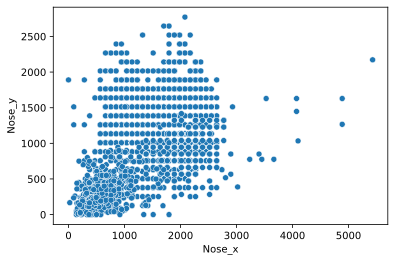

In [19]:
sns.scatterplot(coords['Nose_x'], coords['Nose_y'])
plt.show

<AxesSubplot:xlabel='Right Shoulder_x', ylabel='Right Shoulder_y'>

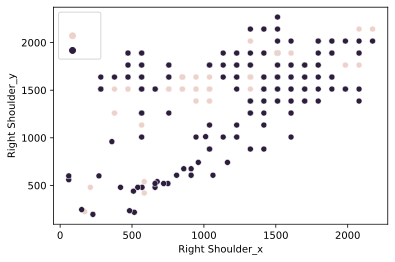

In [92]:
sns.scatterplot(data=coords, x='Right Shoulder_x', y='Right Shoulder_y', hue='Label')

<AxesSubplot:>

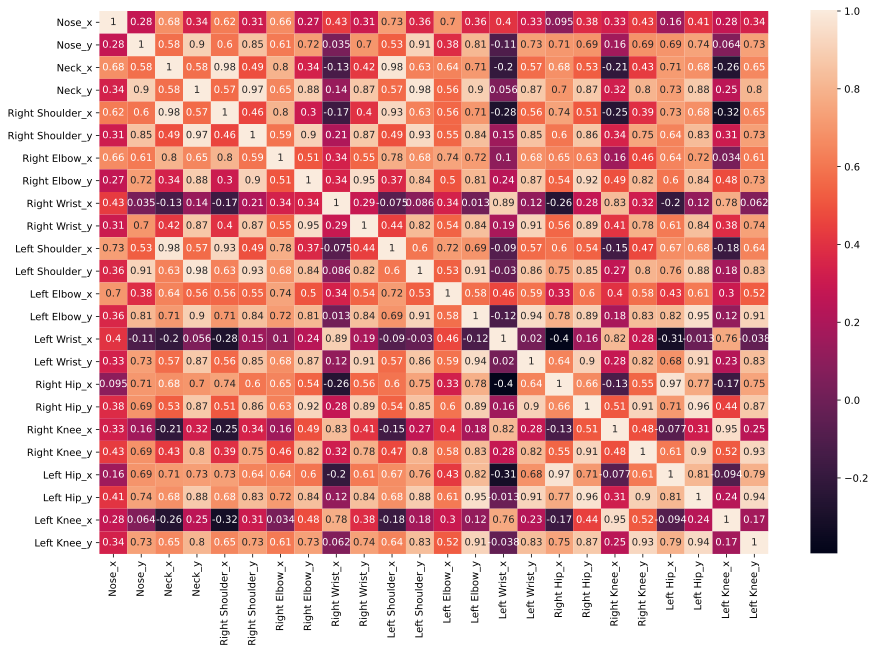

In [93]:
plt.figure(figsize=(15, 10))
sns.heatmap(coords.drop(['Label', 'New_Label'], axis=1).corr(), annot=True)

In [20]:
y_train = coords['Label']
print(f'Признаков класса 1: {np.sum(y_train.to_numpy() == 1)}\nПризнаков класса 2: {np.sum(y_train.to_numpy() == 2)}')
if np.sum(y_train.to_numpy()==1) > np.sum(y_train.to_numpy()==2):
    print(f'Признаков класса 1 в {np.sum(y_train.to_numpy()==1)/np.sum(y_train.to_numpy()==2):.2f} раз больше')
else:
    print(f'Признаков класса 2 в {np.sum(y_train.to_numpy()==2)/np.sum(y_train.to_numpy()==1):.2f} раз больше')   

Признаков класса 1: 1273
Признаков класса 2: 1867
Признаков класса 2 в 1.47 раз больше


In [21]:
coords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nose_x            3066 non-null   float64
 1   Nose_y            3066 non-null   float64
 2   Neck_x            3123 non-null   float64
 3   Neck_y            3123 non-null   float64
 4   Right Shoulder_x  3117 non-null   float64
 5   Right Shoulder_y  3117 non-null   float64
 6   Right Elbow_x     2756 non-null   float64
 7   Right Elbow_y     2756 non-null   float64
 8   Right Wrist_x     2823 non-null   float64
 9   Right Wrist_y     2823 non-null   float64
 10  Left Shoulder_x   3116 non-null   float64
 11  Left Shoulder_y   3116 non-null   float64
 12  Left Elbow_x      2839 non-null   float64
 13  Left Elbow_y      2839 non-null   float64
 14  Left Wrist_x      2884 non-null   float64
 15  Left Wrist_y      2884 non-null   float64
 16  Right Hip_x       3034 non-null   float64


In [22]:
y = coords['New_Label']
X = coords.drop(['Label', 'New_Label', 'Image_Name'], axis=1)

## Заполнение пропусков нулями

In [21]:
X.fillna(0, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<AxesSubplot:>

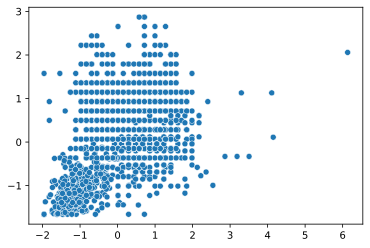

In [24]:
sns.scatterplot(X_train_scaled[:, 0], X_train_scaled[:, 1])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, accuracy_score

In [26]:

param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 5
log = LogisticRegression(solver='liblinear', random_state=0)
log_reg = GridSearchCV(log, param_grid, cv=cv)
log_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [27]:
precision_score(y_test, log_reg.best_estimator_.predict(X_test_scaled))

0.7910714285714285

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       382
           1       0.79      0.79      0.79       560

    accuracy                           0.75       942
   macro avg       0.74      0.74      0.74       942
weighted avg       0.75      0.75      0.75       942



In [35]:
import matplotlib

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[265 117]
 [117 443]]


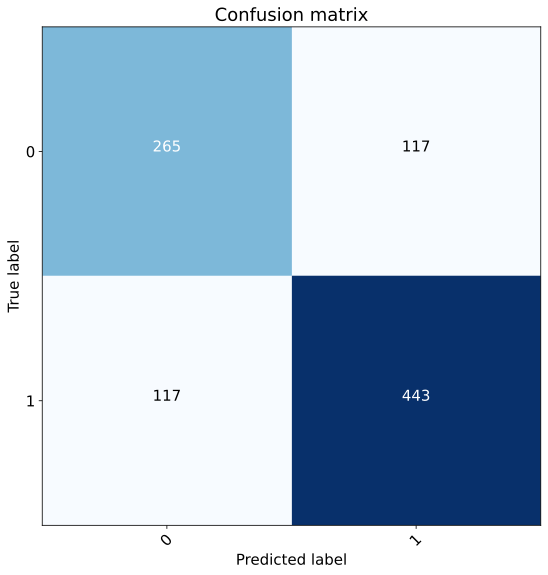

In [30]:
import itertools
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, log_reg.predict(X_test_scaled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCOLogReg.png")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

param_grid ={'n_estimators': [i for i in range(1, 100, 10)],
             'criterion': ['gini', 'entropy'],
             'max_depth': [i for i in range(2, 11, 3)]
             
}

clf = RandomForestClassifier(class_weight='balanced')
clf_cv = GridSearchCV(clf, param_grid, cv=10, scoring='f1')
clf_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 8],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]},
             scoring='f1')

Confusion matrix, without normalization
[[289  93]
 [ 75 485]]


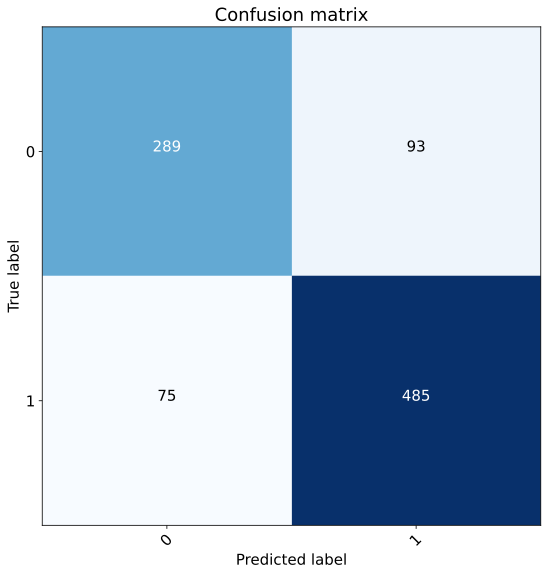

In [32]:
import itertools
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, clf_cv.predict(X_test_scaled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCORandomForest.png")
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_cv.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       382
           1       0.84      0.87      0.85       560

    accuracy                           0.82       942
   macro avg       0.82      0.81      0.81       942
weighted avg       0.82      0.82      0.82       942



In [34]:
precision_score(y_test, clf_cv.predict(X_test_scaled))

0.8391003460207612

In [35]:
f1_score(y_test, clf_cv.predict(X_test_scaled))

0.8523725834797891

In [36]:
recall_score(y_test, clf_cv.predict(X_test_scaled))

0.8660714285714286

In [37]:
accuracy_score(y_test, clf_cv.predict(X_test_scaled))

0.821656050955414

In [38]:
from catboost import CatBoostClassifier

clf_cb = CatBoostClassifier()
params = {'iterations': [i for i in range(100, 150)],
          'learning_rate': [0.1],
          'depth': [3],
          'loss_function': ['Logloss']
         }

clf_grid = GridSearchCV(clf_cb, params, scoring='f1', n_jobs=-1)

clf_grid.fit(X_train_scaled, y_train)
print(f'Лучшее качество - {roc_auc_score(y_test, clf_grid.best_estimator_.predict_proba(X_test_scaled)[:,1])}')
print(f'Параметры: {clf_grid.best_params_}')

0:	learn: 0.6785026	total: 163ms	remaining: 24.2s
1:	learn: 0.6623488	total: 170ms	remaining: 12.5s
2:	learn: 0.6505557	total: 175ms	remaining: 8.53s
3:	learn: 0.6416714	total: 180ms	remaining: 6.51s
4:	learn: 0.6296321	total: 184ms	remaining: 5.31s
5:	learn: 0.6182979	total: 190ms	remaining: 4.52s
6:	learn: 0.6124231	total: 194ms	remaining: 3.94s
7:	learn: 0.6040311	total: 200ms	remaining: 3.52s
8:	learn: 0.5977787	total: 204ms	remaining: 3.18s
9:	learn: 0.5893179	total: 208ms	remaining: 2.89s
10:	learn: 0.5841955	total: 213ms	remaining: 2.67s
11:	learn: 0.5771642	total: 218ms	remaining: 2.49s
12:	learn: 0.5734579	total: 222ms	remaining: 2.33s
13:	learn: 0.5692670	total: 228ms	remaining: 2.2s
14:	learn: 0.5663909	total: 233ms	remaining: 2.08s
15:	learn: 0.5621106	total: 238ms	remaining: 1.98s
16:	learn: 0.5574490	total: 242ms	remaining: 1.88s
17:	learn: 0.5526721	total: 247ms	remaining: 1.79s
18:	learn: 0.5487746	total: 253ms	remaining: 1.73s
19:	learn: 0.5460109	total: 258ms	remainin

Confusion matrix, without normalization
[[272 110]
 [ 63 497]]


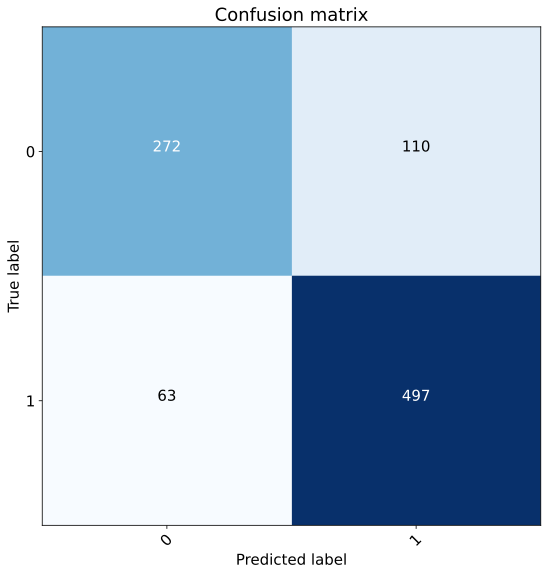

In [39]:
import itertools
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, clf_grid.predict(X_test_scaled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCOCatBoost.png")
plt.show()

In [40]:
f1_score(y_test, clf_grid.predict(X_test_scaled))

0.8517566409597258

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_grid.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       382
           1       0.82      0.89      0.85       560

    accuracy                           0.82       942
   macro avg       0.82      0.80      0.81       942
weighted avg       0.82      0.82      0.81       942



In [42]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced')
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
svm_grid = GridSearchCV(svm, param_grid, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

Confusion matrix, without normalization
[[337  45]
 [120 440]]


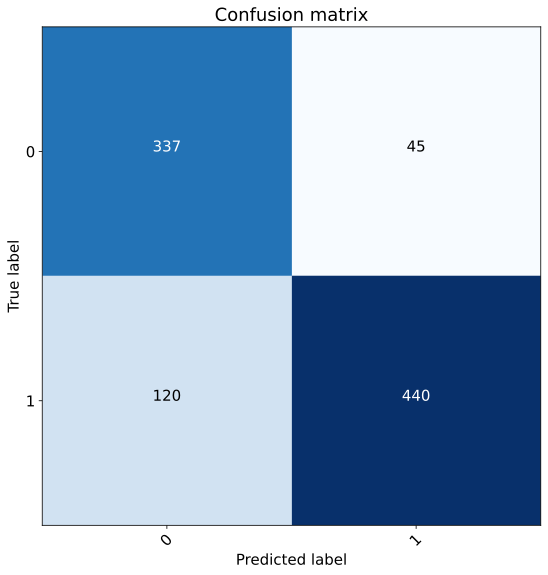

In [43]:
import itertools
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, svm_grid.predict(X_test_scaled))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCOSVM.png")
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_grid.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       382
           1       0.91      0.79      0.84       560

    accuracy                           0.82       942
   macro avg       0.82      0.83      0.82       942
weighted avg       0.84      0.82      0.83       942



## Заполнение пропусков с помощью KNN

In [23]:
X_knn = coords.drop(['Label', 'New_Label', 'Image_Name'], axis=1)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X_knn)
X_knn = imputer.transform(X_knn)

In [24]:
from sklearn.model_selection import train_test_split
(X_train_knn, X_test_knn, y_train, y_test) = train_test_split(X_knn, y, test_size=0.3, random_state=123, stratify=y)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler_knn = StandardScaler()
scaler_knn.fit(X_train_knn)
X_train_sc_knn= scaler_knn.transform(X_train_knn)
X_test_sc_knn = scaler_knn.transform(X_test_knn)

In [26]:
X_train_sc_knn.shape

(2198, 24)

In [27]:
!pip install catboost

^C


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Логистическая регрессия

In [32]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 5
log = LogisticRegression(solver='liblinear', random_state=0)
log_reg_knn = GridSearchCV(log, param_grid, cv=cv)
log_reg_knn.fit(X_train_sc_knn, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [33]:
print(classification_report(y_test, log_reg_knn.predict(X_test_sc_knn)))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       382
           1       0.81      0.78      0.80       560

    accuracy                           0.76       942
   macro avg       0.76      0.76      0.76       942
weighted avg       0.77      0.76      0.77       942



Confusion matrix, without normalization
[[282 100]
 [122 438]]


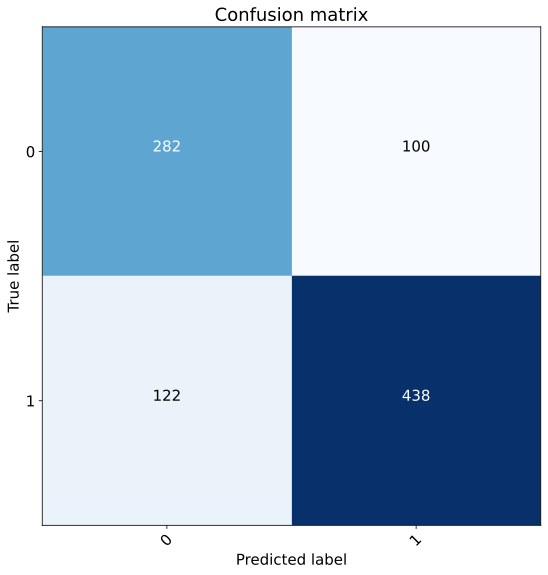

In [36]:
import itertools
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, log_reg_knn.predict(X_test_sc_knn))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCOLogReg.png")
plt.show()

### Random Forest

In [37]:
clf = RandomForestClassifier(class_weight='balanced')
param_grid ={'n_estimators': [i for i in range(1, 100, 10)],
             'criterion': ['gini', 'entropy'],
             'max_depth': [i for i in range(2, 11, 3)]
             
}
clf_cv_knn = GridSearchCV(clf, param_grid, cv=10, scoring='f1')
clf_cv_knn.fit(X_train_sc_knn, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 8],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]},
             scoring='f1')

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       382
           1       0.83      0.86      0.84       560

    accuracy                           0.81       942
   macro avg       0.81      0.80      0.80       942
weighted avg       0.81      0.81      0.81       942

Confusion matrix, without normalization
[[285  97]
 [ 80 480]]


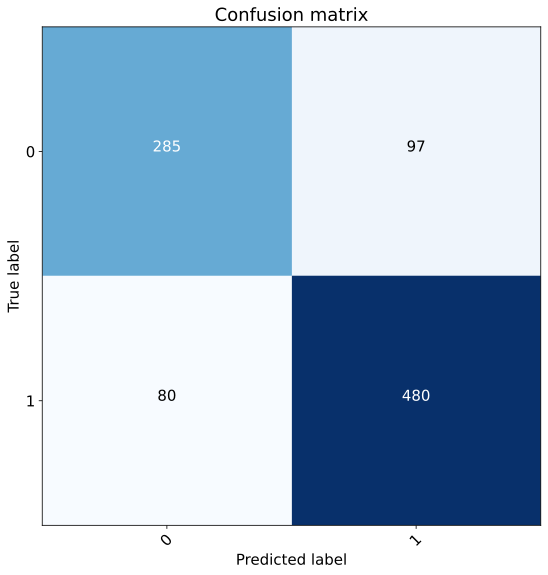

In [38]:
print(classification_report(y_test, clf_cv_knn.predict(X_test_sc_knn)))
cnf_matrix = confusion_matrix(y_test, clf_cv_knn.predict(X_test_sc_knn))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCORandomFor.png")
plt.show()

### CatBoost

In [39]:
clf_cb = CatBoostClassifier()
params = {'iterations': [i for i in range(100, 151, 10)],
          'learning_rate': [0.01, 0.03, 0.05, 0.1],
          'depth': [i for i in range(5, 10)],
          'loss_function': ['Logloss']
         }

cb_cv_knn = GridSearchCV(clf_cb, params, scoring='f1', n_jobs=-1)

cb_cv_knn.fit(X_train_sc_knn, y_train)
print(f'Лучшее качество - {roc_auc_score(y_test, cb_cv_knn.best_estimator_.predict_proba(X_test_sc_knn)[:,1])}')
print(f'Параметры: {cb_cv_knn.best_params_}')

0:	learn: 0.6672787	total: 175ms	remaining: 26.1s
1:	learn: 0.6326951	total: 190ms	remaining: 14.1s
2:	learn: 0.6131120	total: 204ms	remaining: 10s
3:	learn: 0.5899776	total: 218ms	remaining: 7.97s
4:	learn: 0.5762457	total: 236ms	remaining: 6.83s
5:	learn: 0.5575184	total: 250ms	remaining: 6s
6:	learn: 0.5494508	total: 266ms	remaining: 5.43s
7:	learn: 0.5373324	total: 279ms	remaining: 4.95s
8:	learn: 0.5254919	total: 293ms	remaining: 4.59s
9:	learn: 0.5112205	total: 310ms	remaining: 4.33s
10:	learn: 0.5039973	total: 325ms	remaining: 4.11s
11:	learn: 0.4949645	total: 340ms	remaining: 3.91s
12:	learn: 0.4869736	total: 358ms	remaining: 3.77s
13:	learn: 0.4809048	total: 376ms	remaining: 3.65s
14:	learn: 0.4766258	total: 393ms	remaining: 3.53s
15:	learn: 0.4660054	total: 408ms	remaining: 3.41s
16:	learn: 0.4599588	total: 422ms	remaining: 3.3s
17:	learn: 0.4548237	total: 438ms	remaining: 3.21s
18:	learn: 0.4472496	total: 454ms	remaining: 3.13s
19:	learn: 0.4408792	total: 470ms	remaining: 3.

In [40]:
!telegram-send "Я посчитал"

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       382
           1       0.88      0.89      0.89       560

    accuracy                           0.86       942
   macro avg       0.86      0.86      0.86       942
weighted avg       0.86      0.86      0.86       942

Confusion matrix, without normalization
[[315  67]
 [ 61 499]]


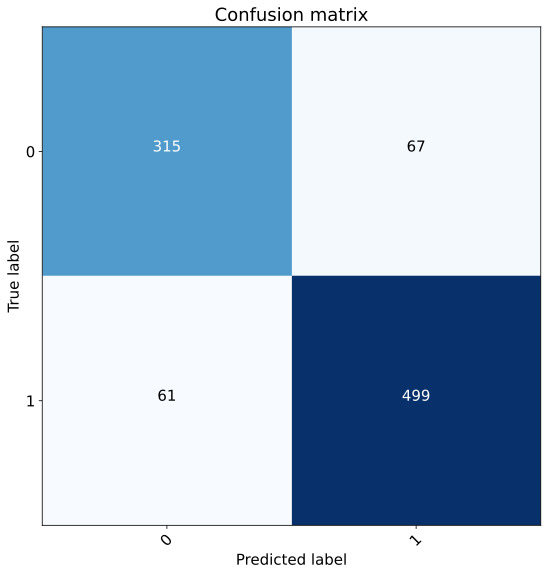

In [41]:
print(classification_report(y_test, cb_cv_knn.predict(X_test_sc_knn)))
cnf_matrix = confusion_matrix(y_test, cb_cv_knn.predict(X_test_sc_knn))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCOGradBoost.png")
plt.show()

In [66]:
import joblib

In [67]:
joblib.dump(imputer, 'knn_missing.pkl')

['knn_missing.pkl']

In [68]:
joblib.dump(cb_cv_knn.best_estimator_, 'cat_boost_model.pkl')

['cat_boost_model.pkl']

In [69]:
joblib.dump(scaler_knn, 'scaler.pkl')

['scaler.pkl']

### SVM

In [42]:
svm = SVC(class_weight='balanced')
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5] + [i for i in range (1, 51)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}
svm_grid_knn = GridSearchCV(svm, param_grid, scoring='f1', n_jobs=-1)
svm_grid_knn.fit(X_train_sc_knn, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                               10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                               22, 23, 24, 25, 26, ...],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [43]:
svm_grid_knn.best_params_

{'C': 50, 'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       382
           1       0.93      0.83      0.88       560

    accuracy                           0.86       942
   macro avg       0.86      0.87      0.86       942
weighted avg       0.87      0.86      0.86       942

Confusion matrix, without normalization
[[349  33]
 [ 97 463]]


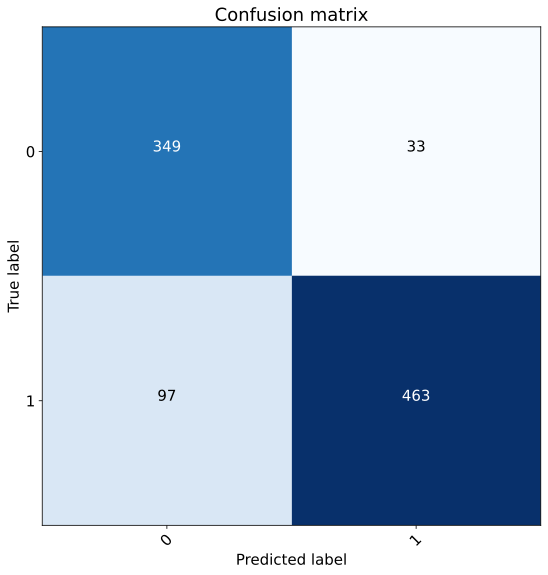

In [44]:
print(classification_report(y_test, svm_grid_knn.predict(X_test_sc_knn)))
cnf_matrix = confusion_matrix(y_test, svm_grid_knn.predict(X_test_sc_knn))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix')
plt.savefig("conf_matrixCOCOSVM.png")
plt.show()